# Data Analysis and Evaluation:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from datetime import datetime
import matplotlib.dates as dt
from bs4 import BeautifulSoup
import requests
import re

In [2]:
# read in polished dataset
data = pd.read_csv("data.csv", index_col=0)
data.head()

,url,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,pa,pub_date
0,https://www.mayoclinic.org/diseases-conditions...,digeorge syndrome (22q11.2 deletion syndrome),45,DiGeorge syndrome (22q11.2 deletion syndrome) ...,151,57561,2212,13,7,70,44,67,45,0.0,2017-07-18
1,https://www.mayoclinic.org/diseases-conditions...,atrial fibrillation,19,"Find out about atrial fibrillation, a heart co...",152,68770,2732,31,19,100,71,75,52,1.0,2019-06-20
2,https://www.mayoclinic.org/diseases-conditions...,abdominal aortic aneurysm,25,An abdominal aortic aneurysm can grow slowly a...,128,48752,1530,26,15,78,49,67,45,0.0,2019-03-15
3,https://www.mayoclinic.org/diseases-conditions...,hyperhidrosis,13,"Learn more about causes, symptoms, treatment a...",153,45026,1385,16,11,75,46,67,45,0.0,2017-10-27
4,https://www.mayoclinic.org/diseases-conditions...,bartholin's cyst,16,A Bartholin's cyst is a fluid-filled lump near...,126,43037,1202,12,6,70,44,67,45,0.0,2020-04-24


In [82]:
# triple check for null values
data.isnull().values.any()

False

In [83]:
# final dataset counts
data.shape

(1055, 17)

## Define functions with which to analyze the data

In [84]:
# function to examine a column of data with summary functions and visual displays
def examine(df, column, bins):
    plt.hist(df[column], bins=bins)
    plt.title(column)
    plt.show()
    print("min:", df[column].min())
    print("max:", df[column].max())
    print("mean:", df[column].mean())
    print("variance:", df[column].var())
    print("stan dev:", df[column].std())

In [85]:
# function to look at the data in a specific range (excluding outliers)
def exclude(df, column, start, end, bins):
    plt.hist(df[column], range = (start, end), bins=bins)
    plt.title(column + ": range " + str(start) + " - " + str(end))
    plt.show()

In [86]:
# function to model patterns or relationships between variables
def relate(x, y):
    plt.scatter(x,y)
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.show()
    print("Covariance:", round(np.cov(x, y)[0,1],5))
    print("Correlation:", round(np.corrcoef(x,y)[0,1],5))
    xdata = x.values.reshape(-1,1)
    ydata = y.values.reshape(-1,1)
    mod = LinearRegression().fit(xdata, ydata)
    print("R squared:", round(mod.score(xdata, ydata),5))
    print("Linear Regression Slope:", mod.coef_[0][0])

In [87]:
# function to compute and display logistic regression
def log_reg(column1, column2):
    model = LogisticRegression(solver="lbfgs").fit(column1.values.reshape(-1, 1), column2)
    model.coef_, model.intercept_

    x_values = np.linspace(0, 25, 100)
    y_values = (np.exp(x_values * model.coef_[0,0] + model.intercept_[0])) / (1 + (np.exp(x_values * model.coef_[0,0] + model.intercept_[0])))
    
    plt.scatter(column1, column2 + np.random.normal(0, 0.05, size=len(column1)), alpha=0.1)
    plt.plot(x_values, y_values)
    plt.xlabel(column1.name)
    plt.ylabel(column2.name)
    plt.show()

## Header Length (H1-1)

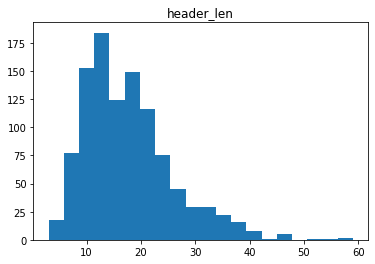

min: 3
max: 59
mean: 17.608530805687202
variance: 67.13977535365163
stan dev: 8.193886462091822


In [88]:
examine(data, "header_len", 20)

SEO strategy recommends short, descriptive h1 headers that contains a page keyword; here, that means the name of the condition. It thus is unsurprising that the data peaks between 10 and 20 characters. It is not a normal distribution, since headers are more likely to have more characters than fewer; those that have more are likely conditions with long names or two different names (one more scientific, one translated from medical terminology into a name more evident), where one is listed after the other in parentheses. 

In [89]:
# like these
data[data["header_len"]>40]['header'].values.tolist()

['digeorge syndrome (22q11.2 deletion syndrome)',
 'attention-deficit/hyperactivity disorder (adhd) in children',
 'adult attention-deficit/hyperactivity disorder (adhd)',
 'benign paroxysmal positional vertigo (bppv)',
 'subconjunctival hemorrhage (broken blood vessel in eye)',
 'paraneoplastic syndromes of the nervous system',
 'diffuse idiopathic skeletal hyperostosis (dish)',
 'persistent depressive disorder (dysthymia)',
 'premature ventricular contractions (pvcs)',
 'focal segmental glomerulosclerosis (fsgs)',
 'helicobacter pylori (h. pylori) infection',
 'monoclonal gammopathy of undetermined significance (mgus)',
 'orthostatic hypotension (postural hypotension)',
 'spontaneous coronary artery dissection (scad)']

## Meta Description Length

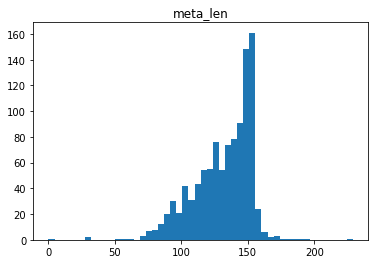

min: 0
max: 229
mean: 131.75071090047393
variance: 494.1531660026799
stan dev: 22.229556135979863


In [90]:
examine(data, "meta_len", 50)

In [91]:
len(data.loc[data["meta_len"]>160]['meta_len'])

17

According to Moz (https://moz.com/learn/seo/meta-description), Google usually only shows meta descriptions up to 160 characters long. The Mayo Clinic has kept all but 17 of their top-ranking Symptoms and Causes meta descriptions within this limit.

## Page Size (bytes)

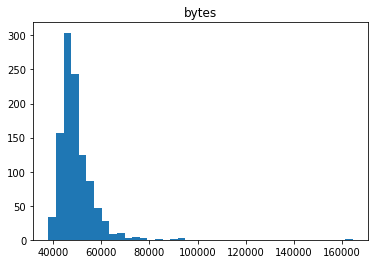

min: 38098
max: 164386
mean: 49471.404739336496
variance: 55354607.32464546
stan dev: 7440.0676962407715


In [92]:
examine(data, "bytes", 40)

In [93]:
# the outlier is a page on COVID-19!
data.loc[data["bytes"]==164386]

,url,keyword,pub_date,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,min_monthly_volume,max_monthly_volume
9576,https://www.mayoclinic.org/diseases-conditions...,signs and symptoms of,2020-05-21,coronavirus disease 2019 (covid-19),35,Find out about coronavirus disease 2019 (COVID...,157,164386,5194,15,7,97,62,263,240,101,200


Unsurprisingly, the largest page is a page on COVID-19, to which the Mayo Clinic may well still be adding as the world continues to research the virus that has caused the current pandemic. The publication date is listed as May 21st, 2020, the current date on which this report is being written.

In [94]:
without = data.loc[data["bytes"]<164386]
data.loc[data.bytes == without['bytes'].max()]

,url,keyword,pub_date,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,min_monthly_volume,max_monthly_volume
5453,https://www.mayoclinic.org/diseases-conditions...,breast cancer,2019-11-22,breast cancer,13,Breast cancer — Comprehensive overview covers ...,109,93906,3409,88,49,139,106,96,73,118001,300000


The next largest page after the one on Coronavirus is one about Breast Cancer, and it is 70480 fewer bytes in size, about 72 MB. The page on COVID-19 is substantially larger in size.

When we exclude the size of the coronavirus page, there is a clear trend between the other less substantial outliers:

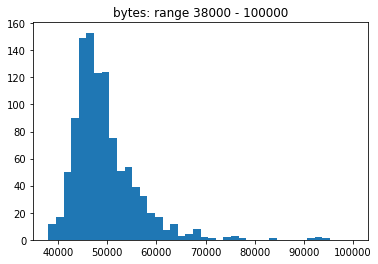

In [95]:
exclude(data, 'bytes', 38000, 100000, 40)

In [96]:
without.loc[without.bytes>80000]

,url,keyword,pub_date,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,min_monthly_volume,max_monthly_volume
1490,https://www.mayoclinic.org/diseases-conditions...,alzheimer's,2018-12-08,alzheimer's disease,19,Alzheimer's disease causes a progressive loss ...,128,91009,3572,15,7,127,85,97,73,118001,300000
4702,https://www.mayoclinic.org/diseases-conditions...,high blood pressure,2018-05-12,high blood pressure (hypertension),34,"Learn about the symptoms, treatment and preven...",142,83830,3147,9,3,131,92,85,58,300001,1508000
5453,https://www.mayoclinic.org/diseases-conditions...,breast cancer,2019-11-22,breast cancer,13,Breast cancer — Comprehensive overview covers ...,109,93906,3409,88,49,139,106,96,73,118001,300000
6162,https://www.mayoclinic.org/diseases-conditions...,is cancer a disease,2018-12-12,cancer,6,"Find out the basics about cancer, including sy...",120,93326,3532,26,21,130,99,104,80,4301,6500
7446,https://www.mayoclinic.org/diseases-conditions...,heart disease,2018-03-22,heart disease,13,"Learn about symptoms, causes and treatment of ...",132,93732,4052,39,26,130,88,88,64,30301,70800


These larger pages are all about more commonly diagnosed conditions with various forms.

## Word Count

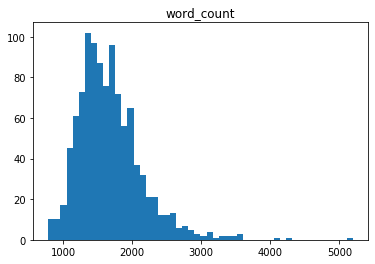

min: 788
max: 5194
mean: 1681.9374407582939
variance: 224922.45528566418
stan dev: 474.25990267538344


In [97]:
examine(data, "word_count", 50)

Word count is a little more difficult to analyze in terms of SEO. Web pages should not be too thin, and should include good "anchor content" unique to the page and the subject, but lots of content does not necessarily mean that it is of good quality. There is a general consensus in the SEO world that a word count of around 1500 is average for high-ranking pages, though the suggested amount of content varies for different kinds of web pages (such as a blog versus a healthcare education page). The Mayo Clinic's average word count is 1655 for their Symptoms and Causes pages, but we can see from the histogram that there appear to be some outliers affecting that number.

In [98]:
# unsurprisingly, coronavirus again
data.loc[data["word_count"]==5194]

,url,keyword,pub_date,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,min_monthly_volume,max_monthly_volume
9576,https://www.mayoclinic.org/diseases-conditions...,signs and symptoms of,2020-05-21,coronavirus disease 2019 (covid-19),35,Find out about coronavirus disease 2019 (COVID...,157,164386,5194,15,7,97,62,263,240,101,200


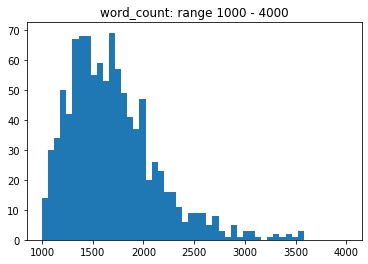

In [99]:
exclude(data, 'word_count', 1000, 4000, 50)

In [100]:
# other pages with word count far above average
data.loc[data["word_count"]>4000]

,url,keyword,pub_date,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,min_monthly_volume,max_monthly_volume
743,https://www.mayoclinic.org/diseases-conditions...,substance use disorder,2017-10-26,drug addiction (substance use disorder),39,"With drug addiction (substance use disorder), ...",160,70000,4308,10,5,74,46,69,46,4301,6500
7446,https://www.mayoclinic.org/diseases-conditions...,heart disease,2018-03-22,heart disease,13,"Learn about symptoms, causes and treatment of ...",132,93732,4052,39,26,130,88,88,64,30301,70800
9576,https://www.mayoclinic.org/diseases-conditions...,signs and symptoms of,2020-05-21,coronavirus disease 2019 (covid-19),35,Find out about coronavirus disease 2019 (COVID...,157,164386,5194,15,7,97,62,263,240,101,200


The other pages with high word count are heart disease and substace abuse disorder. Both are relatively common conditions, and both describe a range of conditions, explaining the need for more words.

### Inlinks
*Number of links to this page on the Mayo Clinic domain.*

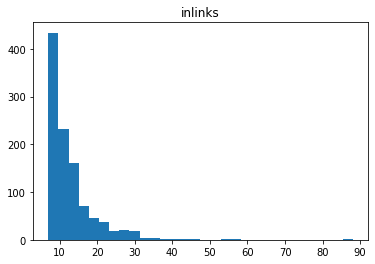

min: 7
max: 88
mean: 12.632227488151658
variance: 46.64260366736513
stan dev: 6.829539052334727


In [101]:
examine(data, "inlinks", 30)

Most Symptoms and Causes pages on the Mayo Clinic site seem to have around 10 other Mayo Clinic pages linking to them. These would likely be related conditions and the Diagnosis and Treatment, Doctors and Departments, and Care at Mayo Clinic pages for the condition, as well as the index page the condition is listed under and any other related page on the website that for which linking to a Symptoms and Causes page would make sense.

In [102]:
data[data.inlinks>60]

,url,keyword,pub_date,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,min_monthly_volume,max_monthly_volume
5453,https://www.mayoclinic.org/diseases-conditions...,breast cancer,2019-11-22,breast cancer,13,Breast cancer — Comprehensive overview covers ...,109,93906,3409,88,49,139,106,96,73,118001,300000


It's interesting that breast cancer is the page with the most internal inlinks of those that I am examining. There are several types of breast cancer as well as conditions that can lead to breast cancer, and of course there are also many other kinds of cancer. It is possible that such pages link between one another on the Mayo Clinic domain.

In [103]:
data[data.inlinks>50]

,url,keyword,pub_date,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,min_monthly_volume,max_monthly_volume
2827,https://www.mayoclinic.org/diseases-conditions...,irregular heartbeat,2019-11-19,heart arrhythmia,16,Learn about common heart disorders that can ca...,103,68502,3397,54,34,94,65,67,45,30301,70800
5381,https://www.mayoclinic.org/diseases-conditions...,brain tumor symptoms,2019-04-27,brain tumor,11,Find out more about the different brain tumor ...,122,60423,2007,57,31,105,77,70,48,30301,70800
5453,https://www.mayoclinic.org/diseases-conditions...,breast cancer,2019-11-22,breast cancer,13,Breast cancer — Comprehensive overview covers ...,109,93906,3409,88,49,139,106,96,73,118001,300000
9291,https://www.mayoclinic.org/diseases-conditions...,congenital heart failure,2020-05-14,congenital heart disease in adults,34,Learn about treatments and complications of he...,114,60740,2005,53,29,112,83,70,48,4301,6500


### Unique Inlinks
*Number of links to this page on the Mayo Clinic domain with links from the same page counted only once.*

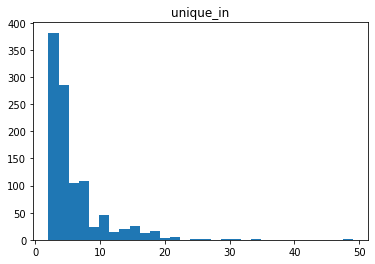

min: 2
max: 49
mean: 5.8303317535545025
variance: 21.133424462890186
stan dev: 4.597110447105898


In [104]:
examine(data, "unique_in", 30)

This data largely resembles the total inlinks, except on a smaller scale.

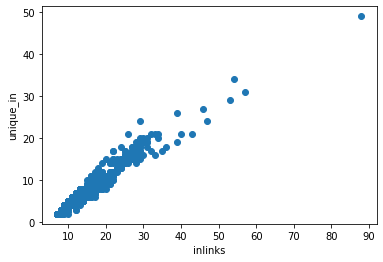

Covariance: 30.50301
Correlation: 0.97155
R squared: 0.94391
Linear Regression Slope: 0.6539730627733717


In [105]:
relate(data.inlinks, data.unique_in)

In [106]:
data[data.unique_in>35]

,url,keyword,pub_date,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,min_monthly_volume,max_monthly_volume
5453,https://www.mayoclinic.org/diseases-conditions...,breast cancer,2019-11-22,breast cancer,13,Breast cancer — Comprehensive overview covers ...,109,93906,3409,88,49,139,106,96,73,118001,300000


As one would therefore expect, the page that had the most inlinks also has the most unique inlinks.

## Outlinks
*Number of links from this page to other pages on the Mayo Clinic domain.*

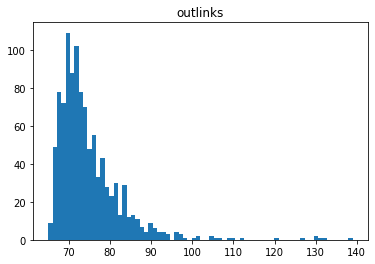

min: 65
max: 139
mean: 74.95071090047394
variance: 65.5668282417691
stan dev: 8.097334638124394


In [107]:
examine(data, "outlinks", 70)

We can see that Symptoms and Causes pages tend to link more to other page on the Mayo Clinic domain than be linked to. This is largely intuitive since it is more common for pages about conditions and diseases to link to pages for clinics that treat them, research summaries about them, or patient stories than for those pages to link back to the page for the condition itself. 

### Unique Outlinks
*Number of links from this page to other pages on the Mayo Clinic domain with links to the same page counted only once.*

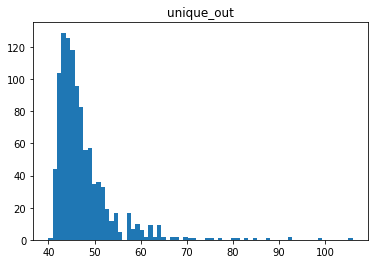

min: 40
max: 106
mean: 47.39810426540284
variance: 44.621248774697165
stan dev: 6.67991382988562


In [108]:
examine(data, "unique_out", 70)

Again, this data resembles the data for total outlinks in shape; we still get the outliers.

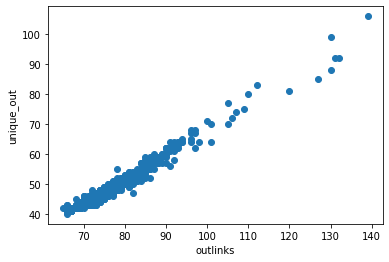

Covariance: 53.25683
Correlation: 0.98461
R squared: 0.96945
Linear Regression Slope: 0.8122526877787078


In [109]:
relate(data.outlinks, data.unique_out)

### External Links
*Number of links from this page to another website (another domain).*

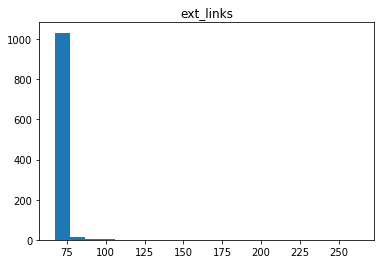

min: 67
max: 263
mean: 68.739336492891
variance: 44.748878117215384
stan dev: 6.68946022614795


In [110]:
examine(data, "ext_links", 20)

The skew in the data here looks more extreme.

In [111]:
data[data.ext_links>100]

,url,keyword,pub_date,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,min_monthly_volume,max_monthly_volume
6162,https://www.mayoclinic.org/diseases-conditions...,is cancer a disease,2018-12-12,cancer,6,"Find out the basics about cancer, including sy...",120,93326,3532,26,21,130,99,104,80,4301,6500
9576,https://www.mayoclinic.org/diseases-conditions...,signs and symptoms of,2020-05-21,coronavirus disease 2019 (covid-19),35,Find out about coronavirus disease 2019 (COVID...,157,164386,5194,15,7,97,62,263,240,101,200


The Symptoms and Causes pages on the Mayo Clinic domain with the most links to other websites are those for cancer and coronavirus, widespread, newsworthy, very serious conditions that are currently affecting the lives of many, and about which people need a wealth of information to learn from and respond to to help with prevention and treatment.

Cancer's external links are about 5 standard deviations above the mean, while coronavirus is almost 29.

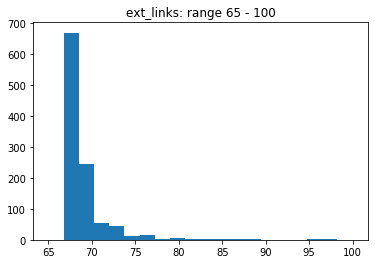

In [112]:
exclude(data, "ext_links", 65, 100, 20)

In [113]:
data[data.ext_links>90]

,url,keyword,pub_date,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,min_monthly_volume,max_monthly_volume
1490,https://www.mayoclinic.org/diseases-conditions...,alzheimer's,2018-12-08,alzheimer's disease,19,Alzheimer's disease causes a progressive loss ...,128,91009,3572,15,7,127,85,97,73,118001,300000
5453,https://www.mayoclinic.org/diseases-conditions...,breast cancer,2019-11-22,breast cancer,13,Breast cancer — Comprehensive overview covers ...,109,93906,3409,88,49,139,106,96,73,118001,300000
6162,https://www.mayoclinic.org/diseases-conditions...,is cancer a disease,2018-12-12,cancer,6,"Find out the basics about cancer, including sy...",120,93326,3532,26,21,130,99,104,80,4301,6500
9576,https://www.mayoclinic.org/diseases-conditions...,signs and symptoms of,2020-05-21,coronavirus disease 2019 (covid-19),35,Find out about coronavirus disease 2019 (COVID...,157,164386,5194,15,7,97,62,263,240,101,200


Other pages with high numbers of external links include breast cancer and Alzheimer's.

### Unique External Links
*Number of links from this page to another website with links to the same page counted only once.*

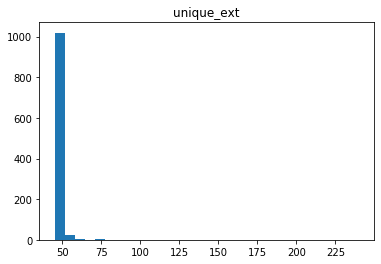

min: 45
max: 240
mean: 46.36587677725119
variance: 42.43716467170877
stan dev: 6.514381372909385


In [114]:
examine(data, "unique_ext", 30)

The average number of unique external outlinks is almost 20 fewer than the average number of all external outlinks, but in both histograms we can see the very tall peak around the mean. 

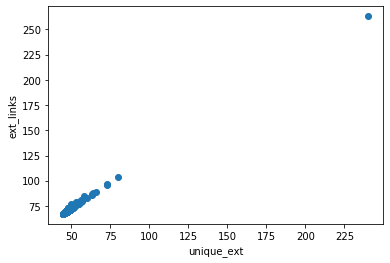

Covariance: 43.38768
Correlation: 0.99564
R squared: 0.9913
Linear Regression Slope: 1.0223982129339277


In [115]:
relate(data.unique_ext, data.ext_links)

In [116]:
data[data.unique_ext>80]

,url,keyword,pub_date,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,min_monthly_volume,max_monthly_volume
9576,https://www.mayoclinic.org/diseases-conditions...,signs and symptoms of,2020-05-21,coronavirus disease 2019 (covid-19),35,Find out about coronavirus disease 2019 (COVID...,157,164386,5194,15,7,97,62,263,240,101,200


In [117]:
focus = data[data.unique_ext<200]
print("The outlier here is again coronavirus, which has", round(data.ext_links.max() / focus.ext_links.max(), 3),
      "times as many external links and")
print(data.unique_ext.max() / focus.unique_ext.max(),
      "times as many unique external links as any other URL in the dataset.")

The outlier here is again coronavirus, which has 2.529 times as many external links and
3.0 times as many unique external links as any other URL in the dataset.


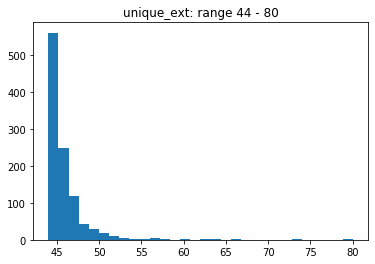

In [118]:
exclude(data, "unique_ext", 44,80, 30)

In [119]:
# look at other outliers
focus[focus.unique_ext>65]

,url,keyword,pub_date,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,min_monthly_volume,max_monthly_volume
1490,https://www.mayoclinic.org/diseases-conditions...,alzheimer's,2018-12-08,alzheimer's disease,19,Alzheimer's disease causes a progressive loss ...,128,91009,3572,15,7,127,85,97,73,118001,300000
5453,https://www.mayoclinic.org/diseases-conditions...,breast cancer,2019-11-22,breast cancer,13,Breast cancer — Comprehensive overview covers ...,109,93906,3409,88,49,139,106,96,73,118001,300000
6162,https://www.mayoclinic.org/diseases-conditions...,is cancer a disease,2018-12-12,cancer,6,"Find out the basics about cancer, including sy...",120,93326,3532,26,21,130,99,104,80,4301,6500
13469,https://www.mayoclinic.org/diseases-conditions...,flu virus,2019-10-04,influenza (flu),15,"Learn more about the symptoms, causes and prev...",131,68565,2899,8,3,82,50,89,66,4301,6500


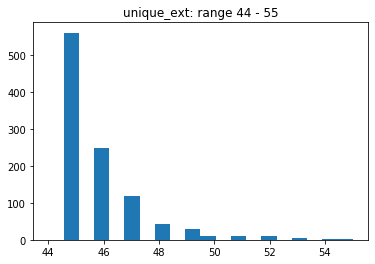

In [120]:
exclude(data, "unique_ext", 44, 55, 20)

Zooming in on the data closer to the mean, we get a better sense of the distribution.

### Minimum Monthly Search Volume

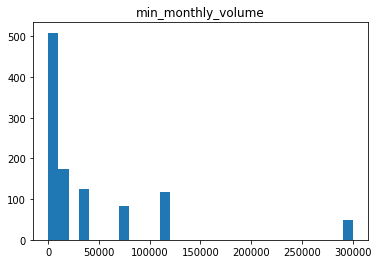

min: 51
max: 300001
mean: 39126.68720379147
variance: 4652787432.520662
stan dev: 68211.34386977479


In [121]:
examine(data, "min_monthly_volume", 30)

In [122]:
# the keywords for these pages are searched at minimum 300,001 times per month!
data[data.min_monthly_volume == 300001]

,url,keyword,pub_date,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,min_monthly_volume,max_monthly_volume
1039,https://www.mayoclinic.org/diseases-conditions...,agoraphobia,2017-11-18,agoraphobia,11,Agoraphobia is an anxiety disorder in which yo...,148,45066,1677,8,3,71,44,67,45,300001,1508000
1733,https://www.mayoclinic.org/diseases-conditions...,anemia,2019-08-16,anemia,6,"There are many forms of anemia, in which you l...",155,50002,2071,13,6,79,50,67,45,300001,1508000
2012,https://www.mayoclinic.org/diseases-conditions...,aneurysm,2019-08-09,brain aneurysm,14,"Learn about detection, diagnosis, treatment op...",154,58456,2451,33,16,82,53,69,47,300001,1508000
2170,https://www.mayoclinic.org/diseases-conditions...,angina,2020-03-25,angina,6,Learn about a type of chest pain caused by red...,127,52546,2299,28,16,79,51,67,45,300001,1508000
2324,https://www.mayoclinic.org/diseases-conditions...,ankylosing spondylitis,2019-11-08,ankylosing spondylitis,22,Learn about this inflammatory disease that can...,107,51038,1592,15,7,81,53,70,47,300001,1508000
2652,https://www.mayoclinic.org/diseases-conditions...,canker sore,2018-04-03,canker sore,11,"Canker sore — Learn about the causes, treatmen...",90,48363,1694,10,5,70,43,69,46,300001,1508000
2759,https://www.mayoclinic.org/diseases-conditions...,appendicitis,2019-05-24,appendicitis,12,Is it just a bellyache or something more serio...,150,44876,1141,12,5,73,46,68,46,300001,1508000
3055,https://www.mayoclinic.org/diseases-conditions...,osteoarthritis,2020-02-22,osteoarthritis,14,This most common form of arthritis mainly affe...,140,57852,1546,15,8,87,60,76,52,300001,1508000
3096,https://www.mayoclinic.org/diseases-conditions...,gout,2019-03-01,gout,4,"This type of arthritis can cause sudden, sever...",146,51315,1972,10,5,72,45,71,47,300001,1508000
3294,https://www.mayoclinic.org/diseases-conditions...,rheumatoid arthritis,2019-03-01,rheumatoid arthritis,20,This chronic inflammatory disorder can affect ...,140,64004,2014,13,8,101,70,70,47,300001,1508000


### Most Recent Publication Date

In [123]:
data.pub_date[0]

'2017-07-18'

In [124]:
# check date type
type(data.pub_date[0])

str

In [125]:
# convert pub_date from string to datetime_ob
dat = []
for date in data.pub_date:
    ob = datetime.strptime(date, '%Y-%m-%d')
    dat.append(ob)
    
# convert pub_date from datetime_ob to float
data.pub_date = dt.date2num(dat)
type(data["pub_date"][0])

numpy.float64

In [126]:
print("min:", data["pub_date"].min(), dt.num2date(data["pub_date"].min()).strftime('%Y-%m-%d'))
print("max:", data["pub_date"].max(), dt.num2date(data["pub_date"].max()).strftime('%Y-%m-%d'))

min: 735352.0 2014-04-29
max: 737566.0 2020-05-21


In [127]:
# updated again today! (may 21, 2020)
data[data.pub_date == 737566.0]

,url,keyword,pub_date,header,header_len,meta,meta_len,bytes,word_count,inlinks,unique_in,outlinks,unique_out,ext_links,unique_ext,min_monthly_volume,max_monthly_volume
9576,https://www.mayoclinic.org/diseases-conditions...,signs and symptoms of,737566.0,coronavirus disease 2019 (covid-19),35,Find out about coronavirus disease 2019 (COVID...,157,164386,5194,15,7,97,62,263,240,101,200
14134,https://www.mayoclinic.org/diseases-conditions...,krabbe,737566.0,krabbe disease,14,"Find out more about this rare, inherited condi...",158,49945,1890,15,7,72,46,67,45,851,1700
19395,https://www.mayoclinic.org/diseases-conditions...,what is msa,737566.0,multiple system atrophy (msa),29,Multiple system atrophy — Comprehensive overvi...,114,47225,1493,18,9,80,50,67,45,851,1700


In [74]:
# individual linear relationship with minimum monthly search volume
for column in ['pub_date', 'header_len', 'meta_len', 'bytes', 'word_count', 'inlinks', 'unique_in', 'outlinks',
       'unique_out', 'ext_links', 'unique_ext']:
    model = LinearRegression().fit(data[[column]], data["min_monthly_volume"])
    print("%s coefficient: %.5f" % (column, model.coef_))

pub_date coefficient: 1.77058
header_len coefficient: -1032.07175
meta_len coefficient: -2.55549
bytes coefficient: 1.76511
word_count coefficient: 26.74500
inlinks coefficient: -158.68036
unique_in coefficient: -310.09504
outlinks coefficient: 1308.75040
unique_out coefficient: 1461.23959
ext_links coefficient: 740.49674
unique_ext coefficient: 626.88251


In [77]:
model = LinearRegression().fit(data[['pub_date', 'header_len', 'meta_len', 'bytes', 'word_count', 'inlinks', 'unique_in', 'outlinks',
       'unique_out', 'ext_links', 'unique_ext']], data["min_monthly_volume"])

print('publication date coefficient: %.4f' % model.coef_[0])
print('header length coefficient: %.4f' % model.coef_[1])
print('meta length coefficient: %.4f' % model.coef_[2])
print('bytes coefficient: %.4f' % model.coef_[3])
print('word count coefficient: %.4f' % model.coef_[4])
print('inbound internal links coefficient: %.4f' % model.coef_[5])
print('unique inbound internal links coefficient: %.4f' % model.coef_[6])
print('outbound internal links coefficient: %.4f' % model.coef_[7])
print('unique outbound internal links coefficient: %.4f' % model.coef_[8])
print('external links coefficient: %.4f' % model.coef_[9])
print('unique external links coefficient: %.4f' % model.coef_[10])

publication date coefficient: -1.0441
header length coefficient: -1046.2453
meta length coefficient: -29.2875
bytes coefficient: 3.7932
word count coefficient: -11.0613
inbound internal links coefficient: 871.5866
unique inbound internal links coefficient: -3583.5955
outbound internal links coefficient: 1682.3793
unique outbound internal links coefficient: -1707.4619
external links coefficient: 6669.6397
unique external links coefficient: -8733.0701
